## Projeto de PDS 2019.1
Igor Dias da Silva

---
#### Questão 1.1

 Utilizando janelamento, crie um filtro FIR passa alta com as seguintes especificações:
 
 ωs = 0.6π, ωp = 0.75π; As = 50 dB

Justifique todas as suas decisões de projeto. 

In [1]:
import numpy as np                   # Para calculos em geral, principalmente de matrizes
from scipy import signal,special     # Para pegar a janela de Kaiser e comparar com a que eu gerei
from scipy.fftpack import fft        # Transformada rápida de Fourier
from scipy.signal import fftconvolve # Convolução usando a transformada rápida de Fourier
from scipy.special import factorial     # Fatorial
import matplotlib.pyplot as plt      # Para plotar resultados

In [2]:
def gera_filtro_ideal(Wc , M):
    filtro = np.arange(0 , M)/1.0
    alpha = (M - 1)/2
    eps = 1e-5
    for n in range(0 , M):
        filtro[n] = np.sin(Wc*(n - alpha))/(np.pi*(n - alpha + eps))
    return filtro

In [3]:
# Dados da questão
Ws = 0.3*np.pi
Wp = 0.2*np.pi
As = 50

Wc = (Ws + Wp)/2

delta_W = np.abs(Wp - Ws)

beta = 0.5842*(As - 21)**0.4 + 0.07886*(As - 21) # Para As =  50

M = int(np.ceil(((As - 7.95)/(14.36*delta_W/(2*np.pi))+1)) + 1)

<StemContainer object of 3 artists>

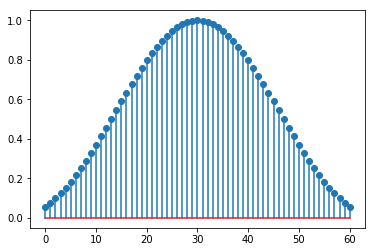

In [4]:
janela_kaiser = np.kaiser(M, beta)
plt.stem(janela_kaiser)

<StemContainer object of 3 artists>

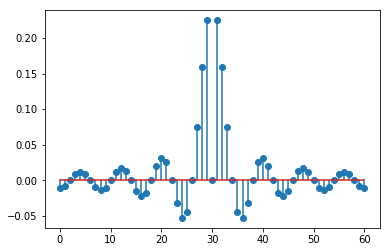

In [5]:
filtro_ideal = gera_filtro_ideal(Wc , M)
plt.stem(filtro_ideal)

<StemContainer object of 3 artists>

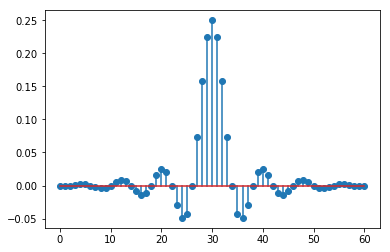

In [6]:
filtro = signal.firwin(M, Wc/np.pi, window=('kaiser', beta))
plt.stem(filtro)

/home/igordds/anaconda3/envs/pds/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 0, 'Freq [rad/amostra]')

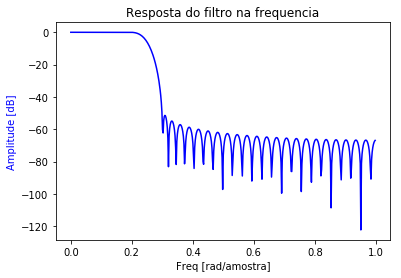

In [7]:
w, h = signal.freqz(filtro)
fig = plt.figure()
plt.title('Resposta do filtro na frequencia')
ax1 = fig.add_subplot(111)
plt.plot(w/np.pi, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Freq [rad/amostra]')